# Import Data and Metadata

In [1]:
# import modules
import pandas as pd

In [2]:
# import data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
863,"GD2 30:1;4 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0
2448,PC O-30:0 (PC 104),12.9068,0.0,21.1568,30.0,33.0,0.0,27.0,32.0,27.0,...,28.5031,30.6764,0.0,0.0,22.0,12.9068,35.0,22.6764,16.8074,23.0
2852,Hex3Cer 34:1;3 (LCB 17:0;2-2H2O),0.0000,0.0,0.0000,0.0,42.0,59.0,0.0,0.0,37.0,...,0.0000,0.0000,30.0,33.0,0.0,0.0000,0.0,0.0000,0.0000,0.0


In [3]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
1847,DMPE O-32:9 (-DMPE),DMPE O,32,9
4290,MADAG 54:3+NH4 (-FA 16:1 (NH4)),MADAG,54,3
3117,HexCer 42:1;2 (LCB 18:0;2-2H2O),HexCer,42,1


In [4]:
# import experiment metedata
df_exps = pd.read_csv('dataframes/pos_exps_df_meta.csv')
df_exps.head()

,sample,protein
0,CAS9-A,CAS9
1,CAS9-A.1,CAS9
2,CAS9-B,CAS9
3,CAS9-B.1,CAS9
4,CAV_A,CAV


# Get Head Groups

In [5]:
# join to row metadata
h = df_meta[['Sample Name', 'Head Group']].merge(df, on='Sample Name')
h.head(3)

,Sample Name,Head Group,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066


In [6]:
# get percentage of each head group per sample
h = h.groupby('Head Group').sum()
h = h/h.sum() * 100
h.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Head Group,,,,,,,,,,,,,,,,,,,,,
DAG,4.740851,6.334687,5.982414,7.976163,3.701230,2.897710,6.052757,5.832416,5.768964,5.606388,...,7.589711,7.395234,6.291292,4.249040,5.447403,5.858102,3.197271,2.823987,2.901110,3.634936
DMPE,0.021450,0.021584,0.024561,0.024157,0.023573,0.017056,0.024068,0.025625,0.024651,0.023108,...,0.048640,0.040558,0.024464,0.025361,0.029475,0.031572,0.038678,0.037218,0.034807,0.036409
DMPE O,0.016326,0.018625,0.017587,0.018805,0.007807,0.007679,0.011360,0.010310,0.009980,0.010156,...,0.044184,0.036090,0.012961,0.016879,0.013899,0.014552,0.015701,0.014740,0.015124,0.012915
GD1,0.016044,0.018330,0.016153,0.014804,0.015150,0.000945,0.021387,0.023814,0.012970,0.009169,...,0.025075,0.023957,0.018323,0.011678,0.013147,0.012065,0.009750,0.009815,0.012324,0.010345
GD2,0.043104,0.037949,0.039832,0.036171,0.069169,0.066001,0.059848,0.063170,0.055799,0.059425,...,0.028670,0.027478,0.024818,0.033961,0.014627,0.014836,0.039112,0.042952,0.041872,0.041213


In [7]:
# join to df_exps to get protein/mutations
h = h.T.rename_axis('sample').merge(df_exps, on='sample')
h.head()

,sample,DAG,DMPE,DMPE O,GD1,GD2,GD3,GM1,GM2,GM3,...,NAPE,PC,PC O,PE,PE O,PG,PG O,SGalCer,TAG,protein
0,CAS9-A,4.740851,0.021450,0.016326,0.016044,0.043104,0.104092,0.094591,0.292353,0.451973,...,2.717372,37.327762,19.935199,12.044634,3.124079,0.301071,0.233314,0.135515,4.266551,CAS9
1,CAS9-A.1,6.334687,0.021584,0.018625,0.018330,0.037949,0.092903,0.089619,0.314853,0.514764,...,2.765547,36.069576,19.277962,12.128402,3.113635,0.298790,0.232379,0.130678,4.283458,CAS9
2,CAS9-B,5.982414,0.024561,0.017587,0.016153,0.039832,0.092446,0.088517,0.297636,0.424039,...,2.855015,36.413687,20.373298,12.491117,3.306537,0.295923,0.225795,0.134028,3.894000,CAS9
3,CAS9-B.1,7.976163,0.024157,0.018805,0.014804,0.036171,0.063548,0.077453,0.195374,0.389636,...,2.722542,37.095226,20.805357,11.545644,2.950666,0.276206,0.201724,0.114556,3.695181,CAS9
4,CAV_A,3.701230,0.023573,0.007807,0.015150,0.069169,0.111128,0.129029,0.204362,0.356603,...,1.819103,41.446867,14.917897,18.646328,5.279815,0.544721,0.744112,0.165363,3.913909,CAV


In [8]:
# drop head groups where all values are zero
h = h.loc[:, (h!=0).any(axis=0)]

In [9]:
# convert to long format
h = h[h.columns[1:]].melt('protein', var_name='head group', value_name='percentage')
h.head()

,protein,head group,percentage
0,CAS9,DAG,4.740851
1,CAS9,DAG,6.334687
2,CAS9,DAG,5.982414
3,CAS9,DAG,7.976163
4,CAV,DAG,3.701230


In [10]:
# remove RAJU
h = h[h['protein'] != 'RAJU']

In [11]:
h[(h['head group'] == 'MAG') & (h['percentage'] != 0)]

,protein,head group,percentage
1054,CAV,MAG,0.010135
1055,CAV,MAG,0.013930
1056,CAV,MAG,0.009475
1057,CAV,MAG,0.009164


# Donut charts for each protein/mutation

In [12]:
# import modules
import altair as alt

In [13]:
len(h['head group'].unique())

37

In [14]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['head group'])

# create head group legend
heads = alt.Chart(h).mark_point().encode(
    x=alt.X('head group').axis(labelAngle=-45),
    color=alt.condition(click, 'head group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'head group', 'subtitleColor':'white'})

for ptn in h['protein'].unique():
    source = h[h['protein'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(percentage):Q',
        color=alt.condition(click, 'head group', alt.value('lightgray'), scale=alt.Scale(scheme='rainbow'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['head group', 'mean(percentage)']
    ).add_params(click).properties(
        width=400,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
d = d.properties(title=alt.Title('Average Percentage of Head Group', color='white')).configure(background='black').configure_axis(labelColor='white')
d.save('graphs/pos_mode_whole_dataset/head_group_donut_charts_interactive.html')
d

alt.VConcatChart(...)

# Donut charts, without PE/PC head groups

In [15]:
# join to row metadata
h = df_meta[['Sample Name', 'Head Group']].merge(df, on='Sample Name')
h.head(3)

,Sample Name,Head Group,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066


In [16]:
# remove PC/PE
h = h[~h['Head Group'].isin(['PE', 'PE O', 'PC', 'PC O'])]

In [17]:
# get percentage of each head group per sample
h = h.groupby('Head Group').sum()
h = h/h.sum() * 100
h.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Head Group,,,,,,,,,,,,,,,,,,,,,
DAG,17.196731,21.538918,21.821394,28.895888,18.779301,16.367363,28.505865,24.605976,20.169169,18.815263,...,42.714274,35.285935,21.831699,15.310317,18.580188,19.482879,8.741984,7.371128,7.440992,9.222391
DMPE,0.077808,0.073388,0.089590,0.087516,0.119602,0.096338,0.113350,0.108109,0.086183,0.077551,...,0.273744,0.193520,0.084893,0.091381,0.100535,0.105001,0.105753,0.097146,0.089276,0.092375
DMPE O,0.059218,0.063329,0.064151,0.068125,0.039614,0.043374,0.053503,0.043494,0.034892,0.034086,...,0.248665,0.172202,0.044977,0.060819,0.047406,0.048398,0.042929,0.038475,0.038791,0.032768
GD1,0.058196,0.062325,0.058920,0.053630,0.076871,0.005338,0.100724,0.100468,0.045347,0.030772,...,0.141121,0.114311,0.063583,0.042080,0.044842,0.040124,0.026659,0.025620,0.031609,0.026247
GD2,0.156355,0.129031,0.145290,0.131038,0.350949,0.372797,0.281860,0.266502,0.195081,0.199433,...,0.161352,0.131109,0.086122,0.122370,0.049892,0.049343,0.106941,0.112114,0.107397,0.104565


In [18]:
# join to df_exps to get protein/mutations
h = h.T.rename_axis('sample').merge(df_exps, on='sample')
h.head()

,sample,DAG,DMPE,DMPE O,GD1,GD2,GD3,GM1,GM2,GM3,...,MADAG,MAG,MMPE,MMPE O,NAPE,PG,PG O,SGalCer,TAG,protein
0,CAS9-A,17.196731,0.077808,0.059218,0.058196,0.156355,0.377578,0.343115,1.060466,1.639466,...,46.904700,0.000000,0.109421,0.078364,9.856861,1.092091,0.846312,0.491562,15.476279,CAS9
1,CAS9-A.1,21.538918,0.073388,0.063329,0.062325,0.129031,0.315885,0.304717,1.070549,1.750277,...,44.301409,0.000000,0.091863,0.065176,9.403289,1.015932,0.790123,0.444327,14.564422,CAS9
2,CAS9-B,21.821394,0.089590,0.064151,0.058920,0.145290,0.337205,0.322875,1.085654,1.546721,...,43.138227,0.000000,0.099846,0.074206,10.413926,1.079406,0.823606,0.488879,14.203714,CAS9
3,CAS9-B.1,28.895888,0.087516,0.068125,0.053630,0.131038,0.230222,0.280594,0.707796,1.411565,...,39.152772,0.000000,0.086285,0.081155,9.863173,1.000634,0.730802,0.415010,13.386828,CAS9
4,CAV_A,18.779301,0.119602,0.039614,0.076871,0.350949,0.563841,0.654668,1.036890,1.809333,...,32.549583,0.051421,0.151598,0.044756,9.229765,2.763807,3.775477,0.839020,19.858390,CAV


In [19]:
# drop head groups where all values are zero
h = h.loc[:, (h!=0).any(axis=0)]

In [20]:
# convert to long format
h = h[h.columns[1:]].melt('protein', var_name='head group', value_name='percentage')
h.head()

,protein,head group,percentage
0,CAS9,DAG,17.196731
1,CAS9,DAG,21.538918
2,CAS9,DAG,21.821394
3,CAS9,DAG,28.895888
4,CAV,DAG,18.779301


In [21]:
# remove RAJU
h = h[h['protein'] != 'RAJU']

In [22]:
len(h['head group'].unique())

33

In [23]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['head group'])

# create head group legend
heads = alt.Chart(h).mark_point().encode(
    x=alt.X('head group').axis(labelAngle=-45),
    color=alt.condition(click, 'head group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'head group', 'subtitleColor':'white'})

for ptn in h['protein'].unique():
    source = h[h['protein'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(percentage):Q',
        color=alt.condition(click, 'head group', alt.value('lightgray'), scale=alt.Scale(scheme='rainbow'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['head group', 'mean(percentage)']
    ).add_params(click).properties(
        width=400,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
d = d.properties(title=alt.Title('Average Percentage of Head Group', color='white')).configure(background='black').configure_axis(labelColor='white')
d.save('graphs/pos_mode_whole_dataset/head_group_donut_charts_interactive.html')
d

alt.VConcatChart(...)

# Donut charts, without PE/PC head groups, combine similar head groups

In [24]:
# add combined head groups to df_meta
hg_list = df_meta['Head Group'].unique()
hg2_list = []
for hg in hg_list:
    # first sort the O groups (ex: PC, PC O)
    if " " in hg:
        hg2 = hg.split(" ")[0] 
        
    # sort the 1/2/3 groups(GD, GT)
    elif hg[-1] in ['1', '2', '3']:
        hg2 = hg[:-1]
    
    # get the hexcer
    elif 'Hex' in hg:
        hg2 = 'Hex_Cer'
        
    # get the acylglycerols
    elif hg in 'DAG,TAG,MAG':
        hg2='DAG,TAG,MAG'
    
    # all others    
    else:
        hg2 = hg
        
    hg2_list.append(hg2)
    
df_hg = pd.DataFrame({'Head Group': hg_list, 'Head Group 2': hg2_list})
df_hg.sort_values('Head Group').sample(3)

,Head Group,Head Group 2
6,LDMPE,LDMPE
35,TAG,"DAG,TAG,MAG"
23,Hex3Cer,Hex_Cer


In [25]:
df_meta2 = df_meta.merge(df_hg, on='Head Group')
df_meta2.head()

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,Hex_Cer
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,26,2,Hex_Cer
2,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer,26,2,Hex_Cer
3,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer,26,0,Hex_Cer
4,Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer,26,0,Hex_Cer


In [26]:
# join to row metadata
h = df_meta2[['Sample Name', 'Head Group 2']].merge(df, on='Sample Name')
h.head(3)

,Sample Name,Head Group 2,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex_Cer,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex_Cer,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex_Cer,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066


In [27]:
# remove PC/PE
h = h[~h['Head Group 2'].isin(['PE', 'PC'])]

In [28]:
# get percentage of each head group per sample
h = h.groupby('Head Group 2').sum()
h = h/h.sum() * 100
h.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Head Group 2,,,,,,,,,,,,,,,,,,,,,
"DAG,TAG,MAG",32.673011,36.103340,36.025108,42.282716,38.689113,38.426708,39.754807,34.102596,32.986766,30.382070,...,52.418117,43.450360,29.342592,23.432262,32.738304,33.971749,20.823147,18.908315,19.013215,20.424761
DMPE,0.137026,0.136717,0.153741,0.155641,0.159216,0.139711,0.166853,0.151604,0.121075,0.111636,...,0.522409,0.365722,0.129870,0.152200,0.147941,0.153399,0.148681,0.135621,0.128068,0.125143
GD,0.592129,0.507241,0.541415,0.414890,0.991660,1.047658,1.227036,1.078957,0.692570,0.601609,...,0.694453,0.529382,0.647466,0.740231,0.470264,0.427453,0.458609,0.435828,0.405126,0.393727
GM,3.043047,3.125543,2.955250,2.399955,3.500891,2.999142,4.707380,4.160529,2.613758,2.254661,...,1.785792,1.385471,2.996922,3.314059,2.545271,2.423769,1.922533,1.775673,1.819450,1.787784
GT,0.181863,0.179580,0.192929,0.159382,0.317919,0.238648,0.322488,0.301056,0.210074,0.188689,...,0.271554,0.219658,0.126131,0.126477,0.078881,0.070364,0.125470,0.140315,0.119839,0.120041


In [29]:
# join to df_exps to get protein/mutations
h = h.T.rename_axis('sample').merge(df_exps, on='sample')
h.head()

,sample,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,SGalCer,protein
0,CAS9-A,32.673011,0.137026,0.592129,3.043047,0.181863,3.051291,0.008348,0.013469,0.861398,0.059107,0.0,46.904700,0.187785,9.856861,1.938403,0.491562,CAS9
1,CAS9-A.1,36.103340,0.136717,0.507241,3.125543,0.179580,3.151100,0.006877,0.011188,0.609480,0.056815,0.0,44.301409,0.157039,9.403289,1.806055,0.444327,CAS9
2,CAS9-B,36.025108,0.153741,0.541415,2.955250,0.192929,3.071725,0.004726,0.006837,0.866790,0.063381,0.0,43.138227,0.174052,10.413926,1.903012,0.488879,CAS9
3,CAS9-B.1,42.282716,0.155641,0.414890,2.399955,0.159382,2.385067,0.006258,0.006874,0.818050,0.041335,0.0,39.152772,0.167439,9.863173,1.731437,0.415010,CAS9
4,CAV_A,38.689113,0.159216,0.991660,3.500891,0.317919,3.478227,0.027806,0.023044,3.123585,0.334533,0.0,32.549583,0.196354,9.229765,6.539284,0.839020,CAV


In [30]:
# convert to long format
h_long = h[h.columns[1:]].melt('protein', var_name='head group', value_name='percentage')
h_long.head()

,protein,head group,percentage
0,CAS9,"DAG,TAG,MAG",32.673011
1,CAS9,"DAG,TAG,MAG",36.103340
2,CAS9,"DAG,TAG,MAG",36.025108
3,CAS9,"DAG,TAG,MAG",42.282716
4,CAV,"DAG,TAG,MAG",38.689113


In [31]:
# remove RAJU
h_long = h_long[h_long['protein'] != 'RAJU']

In [32]:
len(h_long['head group'].unique())

16

In [33]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['head group'])

# create head group legend
heads = alt.Chart(h_long).mark_point().encode(
    x=alt.X('head group').axis(labelAngle=-45),
    color=alt.condition(click, 'head group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'head group', 'subtitleColor':'white'})

for ptn in h_long['protein'].unique():
    source = h_long[h_long['protein'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=90).encode(
        theta='mean(percentage):Q',
        color=alt.condition(click, 'head group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['head group', 'mean(percentage)']
    ).add_params(click).properties(
        width=400,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
d = d.properties(title={'text':['Average Percentage of Head Group'], 'subtitle':['PE/PC removed'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
d

alt.VConcatChart(...)

# Correlation Map of Head Groups

In [34]:
h.head()

,sample,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,SGalCer,protein
0,CAS9-A,32.673011,0.137026,0.592129,3.043047,0.181863,3.051291,0.008348,0.013469,0.861398,0.059107,0.0,46.904700,0.187785,9.856861,1.938403,0.491562,CAS9
1,CAS9-A.1,36.103340,0.136717,0.507241,3.125543,0.179580,3.151100,0.006877,0.011188,0.609480,0.056815,0.0,44.301409,0.157039,9.403289,1.806055,0.444327,CAS9
2,CAS9-B,36.025108,0.153741,0.541415,2.955250,0.192929,3.071725,0.004726,0.006837,0.866790,0.063381,0.0,43.138227,0.174052,10.413926,1.903012,0.488879,CAS9
3,CAS9-B.1,42.282716,0.155641,0.414890,2.399955,0.159382,2.385067,0.006258,0.006874,0.818050,0.041335,0.0,39.152772,0.167439,9.863173,1.731437,0.415010,CAS9
4,CAV_A,38.689113,0.159216,0.991660,3.500891,0.317919,3.478227,0.027806,0.023044,3.123585,0.334533,0.0,32.549583,0.196354,9.229765,6.539284,0.839020,CAV


In [35]:
# remove sample column
h_corr = h.iloc[:,1:]
h_corr.head()

,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,SGalCer,protein
0,32.673011,0.137026,0.592129,3.043047,0.181863,3.051291,0.008348,0.013469,0.861398,0.059107,0.0,46.904700,0.187785,9.856861,1.938403,0.491562,CAS9
1,36.103340,0.136717,0.507241,3.125543,0.179580,3.151100,0.006877,0.011188,0.609480,0.056815,0.0,44.301409,0.157039,9.403289,1.806055,0.444327,CAS9
2,36.025108,0.153741,0.541415,2.955250,0.192929,3.071725,0.004726,0.006837,0.866790,0.063381,0.0,43.138227,0.174052,10.413926,1.903012,0.488879,CAS9
3,42.282716,0.155641,0.414890,2.399955,0.159382,2.385067,0.006258,0.006874,0.818050,0.041335,0.0,39.152772,0.167439,9.863173,1.731437,0.415010,CAS9
4,38.689113,0.159216,0.991660,3.500891,0.317919,3.478227,0.027806,0.023044,3.123585,0.334533,0.0,32.549583,0.196354,9.229765,6.539284,0.839020,CAV


In [36]:
# drop RAJU
h_corr = h_corr[h_corr['protein'] != 'RAJU']
# drop WT
h_corr = h_corr[h_corr['protein'] != 'WT']

In [37]:
h_corr = h_corr.groupby('protein').mean().T

In [38]:
# create correlation matrix
corr = h_corr.corr()

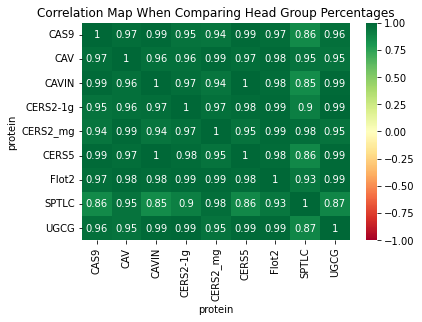

In [39]:
# plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdYlGn', annot=True).set_title('Correlation Map When Comparing Head Group Percentages')
plt.show()

In [43]:
c = df_meta.merge(df, on="Sample Name")
c.head()

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,26,2,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,26,2,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
3,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer,26,2,54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
4,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer,26,0,391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


In [52]:
d = c[c['Acyl Chain Length'] >= 50]
d.head()

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
2296,NAPE 50:3+NH4 (-FA 12:1 (NH4)),NAPE,50,3,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297,NAPE 50:3+NH4 (-FA 12:3 (NH4)),NAPE,50,3,0.0,0.0,0.0,0.0,0.0,0.0,...,5759.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2298,NAPE 50:2+NH4 (-FA 12:0 (NH4)),NAPE,50,2,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2299,NAPE 50:2+NH4 (-FA 12:2 (NH4)),NAPE,50,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300,NAPE 52:3+NH4 (-FA 12:0 (NH4)),NAPE,52,3,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# relative values of head groups for chain lengths over 50
d['Head Group'].value_counts(normalize=True)

MADAG    0.686047
TAG      0.281977
NAPE     0.031977
Name: Head Group, dtype: float64